<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/FDSCodeFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용거래 이상탐지 데이터 Code Function
- 각 과정 함수로 만들기

In [ ]:
import pandas as pd
import numpy as np
import sys

In [ ]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/FDS_1104')

- pickle로 저장한 데이터 잘 불러오는지 확인해보기

In [ ]:
actual_distance = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FDS_1104/actual_distance.pkl')

In [ ]:
actual_distance

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_hour,actual_distance
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,grocery_pos_0,30.216618
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0,1,grocery_pos_0,84.714605
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0,1,grocery_net_0,67.768167
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,0,1,grocery_pos_0,22.322745
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0,1,misc_pos_0,79.398244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,23,3,home_23,98.043837
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,23,3,shopping_pos_23,127.240424
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,kids_pets_23,100.023736
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,kids_pets_23,80.887812


## 본격적인 Code Function 시작

In [ ]:
fraud_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS_1104/fraud.csv')

- 해당 code function을 통해 is_fraud 값을 예측하므로, 해당 컬럼은 일단 삭제

In [ ]:
columns_to_drop = ['is_fraud']
fraud_df = fraud_df.drop(columns_to_drop, axis=1)

In [ ]:
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,...,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054


---

## 1. 컬럼 제거 함수

In [ ]:
def drop_func_before_feature_engineering(data):
    columns_to_drop = [5, 6, 8, 9, 10, 11, 15, 18]
    data.drop(data.columns[columns_to_drop], axis=1, inplace=True)
    return data

In [ ]:
fraud_df = drop_func_before_feature_engineering(fraud_df)

In [ ]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,merch_lat,merch_long
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194


In [ ]:
pd.Series(fraud_df.columns)

,0
0,trans_date_trans_time
1,cc_num
2,merchant
3,category
4,amt
5,gender
6,lat
7,long
8,city_pop
9,dob


- 컬럼 제거 함수를 파일로 저장하기

In [ ]:
script = """
def drop_func_before_feature_engineering(data):
    columns_to_drop = [5, 6, 8, 9, 10, 11, 15, 18]
    data.drop(data.columns[columns_to_drop], axis=1, inplace=True)
    return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/drop_func_before_feature_engineering.py'

with open(filename, 'w') as file:
    file.write(script)

- 실제로 저장되었는지 확인
<br>

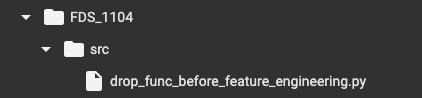

---

## 2. 이상치 처리 함수

In [ ]:
def outlier_func(data):
  # Q1 및 Q3 계산
  Q1 = data['amt'].quantile(0.25)
  Q3 = data['amt'].quantile(0.75)
  IQR = Q3 - Q1

  # 이상치 기준 정하기
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # 이상치 행 제거 및 적용하기
  outliers = (data['amt'] < lower_bound) | (data['amt'] > upper_bound)
  data = data[~outliers]
  return data

In [ ]:
fraud_df = outlier_func(fraud_df)

In [ ]:
fraud_df.describe()

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long
count,4.563340e+05,456334.000000,456334.000000,456334.000000,4.563340e+05,456334.000000,456334.000000
mean,3.716488e+17,46.410078,37.976169,-90.439482,1.180506e+05,37.975144,-90.439196
std,1.261524e+18,43.129865,5.333455,12.952800,3.660691e+05,5.365360,12.966190
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106
25%,2.131124e+14,8.350000,33.746700,-97.235100,1.089000e+03,33.820418,-96.947828
50%,3.531130e+15,36.890000,38.789700,-87.591700,5.621000e+03,38.585822,-87.518838
75%,4.653879e+15,70.210000,41.520500,-80.462600,5.048900e+04,41.656358,-80.646994
max,4.956829e+18,187.380000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624


- 파일로 저장

In [ ]:
script = """
def outlier_func(data):
  # Q1 및 Q3 계산
  Q1 = data['amt'].quantile(0.25)
  Q3 = data['amt'].quantile(0.75)
  IQR = Q3 - Q1

  # 이상치 기준 정하기
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # 이상치 행 제거 및 적용하기
  outliers = (data['amt'] < lower_bound) | (data['amt'] > upper_bound)
  data = data[~outliers]
  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/outlier_func.py'

with open(filename, 'w') as file:
    file.write(script)

---

## 3. 새로운 feature 생성 함수
- [1] 거래 시간 관련 feature
  - `trans_hour`
  - `trans_day`
  - `category_hour`

<br>

- [2] 거리 관련 feature
  - `actual_distance`

<br>

- [3] 거래 금액 및 인구 수를 이용한 feature
  - `amt_per_citypop`

<br>

- [4] 나이 정보 feature
  - `age`

<br>

- [5] 각 사용자별 평균 거래 금액 계산 및 비율 계산 feature
  - `amt_ratio`

<br>

- [6] 사용자 거래 횟수 누적 feature
  - `trans_count`

#### [1] 거래 시간 관련 feature

In [ ]:
def nf_func_trans_time(data):
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
  data['trans_hour'] = data['trans_date_trans_time'].dt.hour
  data['trans_day'] = data['trans_date_trans_time'].dt.dayofweek
  data['category_hour'] = data['category'].astype(str) + '_' + data['trans_hour'].astype(str)

  return data

In [ ]:
fraud_df = nf_func_trans_time(fraud_df)

<ipython-input-19-3358e161dd3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
<ipython-input-19-3358e161dd3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trans_hour'] = data['trans_date_trans_time'].dt.hour
<ipython-input-19-3358e161dd3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
fraud_df.head(30)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,trans_hour,trans_day,category_hour
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1,grocery_pos_0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,1,grocery_pos_0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,1,grocery_net_0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,1,grocery_pos_0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,1,misc_pos_0
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,F,32.1530,-90.1217,19685,1984-12-24,7bb25a43205191eb7344282b88fc54d3,31.939812,-90.726209,0,1,misc_pos_0
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,F,39.7562,-98.4462,242,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,40.332519,-99.062962,0,1,gas_transport_0
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,F,38.9999,-109.6150,46,1987-04-23,47238da5b40d126c8abea40a857c7809,39.807313,-109.348294,0,1,gas_transport_0
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,F,48.3400,-122.3456,85,1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,48.682111,-122.719904,0,1,grocery_pos_0
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,F,38.9999,-109.6150,46,1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,38.419431,-109.380252,0,1,misc_net_0


- 파일로 저장

In [ ]:
script = """
def nf_func_trans_time(data):
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
  data['trans_hour'] = data['trans_date_trans_time'].dt.hour
  data['trans_day'] = data['trans_date_trans_time'].dt.dayofweek
  data['category_hour'] = data['category'].astype(str) + '_' + data['trans_hour'].astype(str)

  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/nf_func_trans_time.py'

with open(filename, 'w') as file:
    file.write(script)

---

#### [2] 거리 관련 feature

In [ ]:
from geopy.distance import geodesic

def nf_func_distance(data):
  def calculate_distance(row):
      user_location = (row['lat'], row['long'])
      merchant_location = (row['merch_lat'], row['merch_long'])
      return geodesic(user_location, merchant_location).kilometers

  data['actual_distance'] = data.apply(calculate_distance, axis=1)
  return data

In [ ]:
fraud_df = nf_func_distance(fraud_df)

<ipython-input-24-6985e38e3f8f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actual_distance'] = data.apply(calculate_distance, axis=1)


In [ ]:
fraud_df.head(30)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,trans_hour,trans_day,category_hour,actual_distance
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1,grocery_pos_0,30.216618
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,1,grocery_pos_0,84.714605
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,1,grocery_net_0,67.768167
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,1,grocery_pos_0,22.322745
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,1,misc_pos_0,79.398244
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,F,32.1530,-90.1217,19685,1984-12-24,7bb25a43205191eb7344282b88fc54d3,31.939812,-90.726209,0,1,misc_pos_0,61.793675
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,F,39.7562,-98.4462,242,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,40.332519,-99.062962,0,1,gas_transport_0,82.856315
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,F,38.9999,-109.6150,46,1987-04-23,47238da5b40d126c8abea40a857c7809,39.807313,-109.348294,0,1,gas_transport_0,92.538075
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,F,48.3400,-122.3456,85,1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,48.682111,-122.719904,0,1,grocery_pos_0,47.032706
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,F,38.9999,-109.6150,46,1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,38.419431,-109.380252,0,1,misc_net_0,67.595321


- 파일로 저장

In [ ]:
script = """
from geopy.distance import geodesic

def nf_func_distance(data):
  def calculate_distance(row):
      user_location = (row['lat'], row['long'])
      merchant_location = (row['merch_lat'], row['merch_long'])
      return geodesic(user_location, merchant_location).kilometers

  data['actual_distance'] = data.apply(calculate_distance, axis=1)
  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/nf_func_distance.py'

with open(filename, 'w') as file:
    file.write(script)

---

#### [3] 거래 금액 및 인구 수를 이용한 feature

In [ ]:
def nf_func_amt_per_citypop(data):
  data['amt_per_citypop'] = data['amt'] / data['city_pop']
  return data

In [ ]:
fraud_df = nf_func_amt_per_citypop(fraud_df)

<ipython-input-29-3e857e7c242e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amt_per_citypop'] = data['amt'] / data['city_pop']


In [ ]:
fraud_df.head(30)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1,grocery_pos_0,30.216618,0.719664
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,1,grocery_pos_0,84.714605,0.000358
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,1,grocery_net_0,67.768167,0.000647
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,1,grocery_pos_0,22.322745,0.002034
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,1,misc_pos_0,79.398244,0.000068
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,F,32.1530,-90.1217,19685,1984-12-24,7bb25a43205191eb7344282b88fc54d3,31.939812,-90.726209,0,1,misc_pos_0,61.793675,0.009213
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,F,39.7562,-98.4462,242,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,40.332519,-99.062962,0,1,gas_transport_0,82.856315,0.221488
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,F,38.9999,-109.6150,46,1987-04-23,47238da5b40d126c8abea40a857c7809,39.807313,-109.348294,0,1,gas_transport_0,92.538075,2.220217
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,F,48.3400,-122.3456,85,1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,48.682111,-122.719904,0,1,grocery_pos_0,47.032706,0.977294
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,F,38.9999,-109.6150,46,1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,38.419431,-109.380252,0,1,misc_net_0,67.595321,3.860217


- 파일로 저장

In [ ]:
script = """
def nf_func_amt_per_citypop(data):
  data['amt_per_citypop'] = data['amt'] / data['city_pop']
  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/nf_func_amt_per_citypop.py'

with open(filename, 'w') as file:
    file.write(script)

---

#### [4] 나이 정보 feature

In [ ]:
from datetime import datetime

def nf_func_age(data):
  data['dob'] = pd.to_datetime(data['dob'])
  data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year

  return data

In [ ]:
fraud_df = nf_func_age(fraud_df)

<ipython-input-34-6ea1fc21ef07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dob'] = pd.to_datetime(data['dob'])
<ipython-input-34-6ea1fc21ef07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year


In [ ]:
fraud_df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1,grocery_pos_0,30.216618,0.719664,41
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,1,grocery_pos_0,84.714605,0.000358,39
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,1,grocery_net_0,67.768167,0.000647,45
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,1,grocery_pos_0,22.322745,0.002034,48
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,1,misc_pos_0,79.398244,0.000068,42
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,F,32.1530,-90.1217,19685,1984-12-24,7bb25a43205191eb7344282b88fc54d3,31.939812,-90.726209,0,1,misc_pos_0,61.793675,0.009213,35
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,F,39.7562,-98.4462,242,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,40.332519,-99.062962,0,1,gas_transport_0,82.856315,0.221488,32
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,F,38.9999,-109.6150,46,1987-04-23,47238da5b40d126c8abea40a857c7809,39.807313,-109.348294,0,1,gas_transport_0,92.538075,2.220217,32
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,F,48.3400,-122.3456,85,1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,48.682111,-122.719904,0,1,grocery_pos_0,47.032706,0.977294,35
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,F,38.9999,-109.6150,46,1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,38.419431,-109.380252,0,1,misc_net_0,67.595321,3.860217,32


- 파일로 저장

In [ ]:
script = """
from datetime import datetime

def nf_func_age(data):
  data['dob'] = pd.to_datetime(data['dob'])
  data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year

  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/nf_func_age.py'

with open(filename, 'w') as file:
    file.write(script)

---

#### [5] 각 사용자별 평균 거래 금액 계산 및 비율 계산 feature

In [ ]:
def nf_func_amt_ratio(data):
  data['amt_ratio'] = data.groupby('cc_num')['amt'].transform(lambda x: x / x.mean())
  return data

In [ ]:
fraud_df = nf_func_amt_ratio(fraud_df)

<ipython-input-39-f4cca3fdb6b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amt_ratio'] = data.groupby('cc_num')['amt'].transform(lambda x: x / x.mean())


In [ ]:
fraud_df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age,amt_ratio
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1,grocery_pos_0,30.216618,0.719664,41,2.614423
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,1,grocery_pos_0,84.714605,0.000358,39,1.056551
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,1,grocery_net_0,67.768167,0.000647,45,0.850281
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,1,grocery_pos_0,22.322745,0.002034,48,1.547211
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,1,misc_pos_0,79.398244,0.000068,42,0.470610
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,F,32.1530,-90.1217,19685,1984-12-24,7bb25a43205191eb7344282b88fc54d3,31.939812,-90.726209,0,1,misc_pos_0,61.793675,0.009213,35,3.328303
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,F,39.7562,-98.4462,242,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,40.332519,-99.062962,0,1,gas_transport_0,82.856315,0.221488,32,1.278456
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,F,38.9999,-109.6150,46,1987-04-23,47238da5b40d126c8abea40a857c7809,39.807313,-109.348294,0,1,gas_transport_0,92.538075,2.220217,32,2.372565
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,F,48.3400,-122.3456,85,1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,48.682111,-122.719904,0,1,grocery_pos_0,47.032706,0.977294,35,2.021831
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,F,38.9999,-109.6150,46,1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,38.419431,-109.380252,0,1,misc_net_0,67.595321,3.860217,32,4.125100


- 파일로 저장

In [ ]:
script = """
def nf_func_amt_ratio(data):
  data['amt_ratio'] = data.groupby('cc_num')['amt'].transform(lambda x: x / x.mean())
  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/nf_func_amt_ratio.py'

with open(filename, 'w') as file:
    file.write(script)

---

#### [6] 사용자 거래 횟수 누적 feature

In [ ]:
def nf_func_trans_count(data):
  data['trans_count'] = data.groupby('cc_num').cumcount() + 1
  return data

In [ ]:
fraud_df = nf_func_trans_count(fraud_df)

<ipython-input-44-c10e2a501b2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trans_count'] = data.groupby('cc_num').cumcount() + 1


In [ ]:
fraud_df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,...,merch_lat,merch_long,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age,amt_ratio,trans_count
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,...,49.159047,-118.186462,0,1,grocery_pos_0,30.216618,0.719664,41,2.614423,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,...,40.079588,-74.848087,0,1,grocery_pos_0,84.714605,0.000358,39,1.056551,1
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,...,40.021888,-74.228188,0,1,grocery_net_0,67.768167,0.000647,45,0.850281,1
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,...,42.360426,-83.552316,0,1,grocery_pos_0,22.322745,0.002034,48,1.547211,1
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,...,29.737426,-90.853194,0,1,misc_pos_0,79.398244,0.000068,42,0.470610,1
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,F,32.1530,-90.1217,19685,1984-12-24,...,31.939812,-90.726209,0,1,misc_pos_0,61.793675,0.009213,35,3.328303,1
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,F,39.7562,-98.4462,242,1987-07-18,...,40.332519,-99.062962,0,1,gas_transport_0,82.856315,0.221488,32,1.278456,1
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,F,38.9999,-109.6150,46,1987-04-23,...,39.807313,-109.348294,0,1,gas_transport_0,92.538075,2.220217,32,2.372565,1
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,F,48.3400,-122.3456,85,1984-09-01,...,48.682111,-122.719904,0,1,grocery_pos_0,47.032706,0.977294,35,2.021831,1
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,F,38.9999,-109.6150,46,1987-04-23,...,38.419431,-109.380252,0,1,misc_net_0,67.595321,3.860217,32,4.125100,2


- 파일로 저장

In [ ]:
script = """
def nf_func_trans_count(data):
  data['trans_count'] = data.groupby('cc_num').cumcount() + 1
  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/nf_func_trans_count.py'

with open(filename, 'w') as file:
    file.write(script)

---

## 4. 원핫인코딩 적용 함수

In [ ]:
def onehot_func(data):
  data = pd.get_dummies(data, columns=['category'], drop_first=True)
  return data

In [ ]:
fraud_df = onehot_func(fraud_df)

In [ ]:
fraud_df.head(10)

,trans_date_trans_time,cc_num,merchant,amt,gender,lat,long,city_pop,dob,trans_num,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,...,True,False,False,False,False,False,False,False,False,False
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,...,True,False,False,False,False,False,False,False,False,False
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,...,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,...,True,False,False,False,False,False,False,False,False,False
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,...,False,False,False,False,False,True,False,False,False,False
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,181.35,F,32.1530,-90.1217,19685,1984-12-24,7bb25a43205191eb7344282b88fc54d3,...,False,False,False,False,False,True,False,False,False,False
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",53.60,F,39.7562,-98.4462,242,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,...,False,False,False,False,False,False,False,False,False,False
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,102.13,F,38.9999,-109.6150,46,1987-04-23,47238da5b40d126c8abea40a857c7809,...,False,False,False,False,False,False,False,False,False,False
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,83.07,F,48.3400,-122.3456,85,1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,...,True,False,False,False,False,False,False,False,False,False
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,177.57,F,38.9999,-109.6150,46,1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,...,False,False,False,False,True,False,False,False,False,False


- 파일로 저장

In [ ]:
script = """
def onehot_func(data):
  data = pd.get_dummies(data, columns=['category'], drop_first=True)
  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/onehot_func.py'

with open(filename, 'w') as file:
    file.write(script)

---

## 5. 피쳐 엔지니어링 이후 필요없어진 컬럼 제거 함수

In [ ]:
def drop_func_after_feature_engineering(data):
  columns_to_drop = ['city_pop']
  data = data.drop(columns_to_drop, axis=1)
  return data

In [ ]:
fraud_df = drop_func_after_feature_engineering(fraud_df)

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
fraud_df.head(10)

,trans_date_trans_time,cc_num,merchant,amt,gender,lat,long,dob,trans_num,merch_lat,merch_long,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age,amt_ratio,trans_count,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,F,48.8878,-118.2105,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1,grocery_pos_0,30.216618,0.719664,41,2.614423,1,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",44.71,M,40.6747,-74.2239,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,1,grocery_pos_0,84.714605,0.000358,39,1.056551,1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,46.28,F,40.6152,-74.4150,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,1,grocery_net_0,67.768167,0.000647,45,0.850281,1,False,False,True,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,64.09,M,42.2203,-83.3583,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,1,grocery_pos_0,22.322745,0.002034,48,1.547211,1,False,False,False,True,False,False,False,False,False,False,False,False,False
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,25.58,F,30.4066,-91.1468,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,1,misc_pos_0,79.398244,0.000068,42,0.470610,1,False,False,False,False,False,False,False,False,True,False,False,False,False
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,181.35,F,32.1530,-90.1217,1984-12-24,7bb25a43205191eb7344282b88fc54d3,31.939812,-90.726209,0,1,misc_pos_0,61.793675,0.009213,35,3.328303,1,False,False,False,False,False,False,False,False,True,False,False,False,False
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",53.60,F,39.7562,-98.4462,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,40.332519,-99.062962,0,1,gas_transport_0,82.856315,0.221488,32,1.278456,1,False,True,False,False,False,False,False,False,False,False,False,False,False
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,102.13,F,38.9999,-109.6150,1987-04-23,47238da5b40d126c8abea40a857c7809,39.807313,-109.348294,0,1,gas_transport_0,92.538075,2.220217,32,2.372565,1,False,True,False,False,False,False,False,False,False,False,False,False,False
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,83.07,F,48.3400,-122.3456,1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,48.682111,-122.719904,0,1,grocery_pos_0,47.032706,0.977294,35,2.021831,1,False,False,False,True,False,False,False,False,False,False,False,False,False
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,177.57,F,38.9999,-109.6150,1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,38.419431,-109.380252,0,1,misc_net_0,67.595321,3.860217,32,4.125100,2,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
pd.Series(fraud_df.columns)

,0
0,trans_date_trans_time
1,cc_num
2,merchant
3,amt
4,gender
5,lat
6,long
7,dob
8,trans_num
9,merch_lat


- 파일로 저장

In [ ]:
script = """
def drop_func_after_feature_engineering(data):
  columns_to_drop = ['city_pop']
  data = data.drop(columns_to_drop, axis=1)
  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/drop_func_after_feature_engineering.py'

with open(filename, 'w') as file:
    file.write(script)

---

## 6. 컬럼 이름 변경 함수

In [ ]:
def rename_cols_func(data):
  def rename_cols(column_name):
    column_name = column_name.lower()
    column_name = column_name.replace(' ', '_')

    replacements = {
          'trans_date_trans_time': 'trans_date_time',
          'cc_num': 'credit_card_num',
          'lat': 'user_lat',
          'long': 'user_long',
          'dob': 'birth'
      }

    for old, new in replacements.items():
      column_name = column_name.replace(old, new)

    return column_name

  data.columns = [rename_cols(col) for col in data.columns]
  return data

In [ ]:
fraud_df = rename_cols_func(fraud_df)

In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456334 entries, 0 to 491133
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_time          456334 non-null  datetime64[ns]
 1   credit_card_num          456334 non-null  int64         
 2   merchant                 456334 non-null  object        
 3   amt                      456334 non-null  float64       
 4   gender                   456334 non-null  object        
 5   user_lat                 456334 non-null  float64       
 6   user_long                456334 non-null  float64       
 7   birth                    456334 non-null  datetime64[ns]
 8   trans_num                456334 non-null  object        
 9   merch_user_lat           456334 non-null  float64       
 10  merch_user_long          456334 non-null  float64       
 11  trans_hour               456334 non-null  int32         
 12  trans_day            

- 파일로 저장

In [ ]:
script = """
def rename_cols_func(data):
  def rename_cols(column_name):
    column_name = column_name.lower()
    column_name = column_name.replace(' ', '_')

    replacements = {
          'trans_date_trans_time': 'trans_date_time',
          'cc_num': 'credit_card_num',
          'lat': 'user_lat',
          'long': 'user_long',
          'dob': 'birth'
      }

    for old, new in replacements.items():
      column_name = column_name.replace(old, new)

    return column_name

  data.columns = [rename_cols(col) for col in data.columns]
  return data
"""

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/FDS_1104/src/rename_cols_func.py'

with open(filename, 'w') as file:
    file.write(script)

---

## 최종 데이터 확인

In [ ]:
fraud_df

,trans_date_time,credit_card_num,merchant,amt,gender,user_lat,user_long,birth,trans_num,merch_user_lat,merch_user_long,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age,amt_ratio,trans_count,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,F,48.8878,-118.2105,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1,grocery_pos_0,30.216618,0.719664,41,2.614423,1,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",44.71,M,40.6747,-74.2239,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,1,grocery_pos_0,84.714605,0.000358,39,1.056551,1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,46.28,F,40.6152,-74.4150,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,1,grocery_net_0,67.768167,0.000647,45,0.850281,1,False,False,True,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,64.09,M,42.2203,-83.3583,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,1,grocery_pos_0,22.322745,0.002034,48,1.547211,1,False,False,False,True,False,False,False,False,False,False,False,False,False
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,25.58,F,30.4066,-91.1468,1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,1,misc_pos_0,79.398244,0.000068,42,0.470610,1,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,134.26,F,34.2651,-77.8670,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,34.853497,-78.664158,23,3,home_23,98.043837,0.000721,37,2.497493,3777,False,False,False,False,False,True,False,False,False,False,False,False,False
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",25.49,F,34.0326,-82.2027,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,35.008839,-81.475156,23,3,shopping_pos_23,127.240424,0.016737,36,0.597260,4246,False,False,False,False,False,False,False,False,False,False,False,True,False
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,111.84,M,29.0393,-95.4401,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,23,3,kids_pets_23,100.023736,0.003892,21,3.253487,3543,False,False,False,False,False,False,True,False,False,False,False,False,False
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,86.88,F,46.1966,-118.9017,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,23,3,kids_pets_23,80.887812,0.023583,39,1.578980,3127,False,False,False,False,False,False,True,False,False,False,False,False,False
